# Proyek Analisis Data: E Commerce Public Dataset
- **Nama:** Mohamad Khotibul Umam
- **Email:** umammuhamad22@gmail.com
- **ID Dicoding:** Muhammmad Umam

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak penggunaan sepeda dalam sehari?
- Apakah hari kerja mempengaruhi jumlah pengguna sepeda dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
df_hour = pd.read_csv('hour.csv')
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [43]:
df_day = pd.read_csv('day.csv')
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Di awal kita melakukan read file csv terlebih dahulu dengan pd.read_csv, ada dua csv yang kita lakukan read yaitu day.csv dan hour.csv day.csv adalah data peminjamaman sepeda dalam hari dan hour.csv adalah data penggunaan sepeda dalam jam
- Selanjutnya kita tampilkan beberapa isi dari csv tersebut dengan method head, disini saya menampilkan 10 row awal saja

### Assessing Data

#### Menilai tabel df_hour


In [44]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [46]:
df_hour.duplicated().sum()

0

In [47]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel df_day


In [48]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [50]:
df_day.duplicated().sum()

0

In [51]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value dikedua dataset
- Tidak ada data duplikat

### Cleaning Data

####Membersihkan Tabel df_hour

In [52]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#####Mengubah tipe data dteday menjadi datetime

In [53]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_hour[column] = pd.to_datetime(df_hour[column])

In [54]:
df_hour.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


####Membersihkan tabel df_day

In [55]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [56]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_day[column] = pd.to_datetime(df_day[column])

In [57]:
df_day.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


**Insight:**
- Didalam dua file csv ini sudah tidak ada missing values dan duplicate jadi saya, menandakan teknik pengumpulan data yang baik
- Column dteday perlu diubah ke tipe datetime untuk mempermudah analisis

## Exploratory Data Analysis (EDA)

### Explore df_hour

In [58]:
df_hour.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13005,13006,2012-07-01,3,1,7,2,0,0,0,1,0.72,0.6970,0.74,0.0896,21,69,90
7837,7838,2011-11-28,4,0,11,5,0,1,1,1,0.40,0.4091,0.87,0.0000,0,34,34
2903,2904,2011-05-05,2,0,5,21,0,4,1,1,0.50,0.4848,0.36,0.1940,39,141,180
12200,12201,2012-05-28,2,1,5,13,1,1,0,1,0.80,0.7879,0.63,0.2836,272,284,556
2514,2515,2011-04-19,2,0,4,16,0,2,1,1,0.56,0.5303,0.52,0.2985,30,162,192
14361,14362,2012-08-26,3,1,8,14,0,0,0,1,0.64,0.5758,0.89,0.1045,125,252,377
12319,12320,2012-06-02,2,1,6,12,0,6,0,1,0.62,0.6212,0.43,0.3582,250,418,668
6294,6295,2011-09-24,4,0,9,20,0,6,0,1,0.62,0.5758,0.83,0.0000,77,166,243
12925,12926,2012-06-27,3,1,6,18,0,3,1,1,0.80,0.6970,0.27,0.3284,85,719,804
105,106,2011-01-05,1,0,1,14,0,3,1,1,0.30,0.2879,0.28,0.1940,10,52,62


In [59]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [60]:
df_hour.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean",]})

cnt                
    max min        mean
hr                     
0   283   2   53.898072
1   168   1   33.375691
2   132   1   22.869930
3    79   1   11.727403
4    28   1    6.352941
5    66   1   19.889819
6   213   1   76.044138
7   596   1  212.064649
8   839   5  359.011004
9   426  14  219.309491
10  539   8  173.668501
11  663  10  208.143054
12  776   3  253.315934
13  760  11  253.661180
14  750  12  240.949246
15  750   7  251.233196
16  783  11  311.983562
17  976  15  461.452055
18  977  23  425.510989
19  743  11  311.523352
20  567  11  226.030220
21  584   6  172.314560
22  502   9  131.335165
23  256   2   87.831044

### Explore df_day

In [61]:
df_day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
640,641,2012-10-02,4,1,10,0,2,1,3,0.590833,0.542333,0.871667,0.104475,315,4324,4639
229,230,2011-08-18,3,0,8,0,4,1,1,0.711667,0.662258,0.654583,0.233208,639,3166,3805
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985
639,640,2012-10-01,4,1,10,0,1,1,2,0.520833,0.512000,0.649167,0.090804,763,6015,6778
350,351,2011-12-17,4,0,12,0,6,0,2,0.258333,0.249371,0.560833,0.243167,275,2464,2739
612,613,2012-09-04,3,1,9,0,2,1,1,0.725833,0.686888,0.755000,0.236321,867,5997,6864
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
36,37,2011-02-06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.141800,354,1269,1623
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167


In [62]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [63]:
df_day.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean",]})

cnt                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857

**Insight:**
- Kita bisa mengetahui di jam berapa sepeda banyak disewa
- Kita bisa mengetahui di hari apa sepeda banyak disewa dan apakah ada hubungan jumlah sepeda yang disewa di weekend dan weekday

## Visualization & Explanatory Analysis

### - Kapan waktu puncak penggunaan sepeda dalam sehari?

<ipython-input-81-d996a078fa48>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_usage.index, y=hourly_usage.values, palette="plasma")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

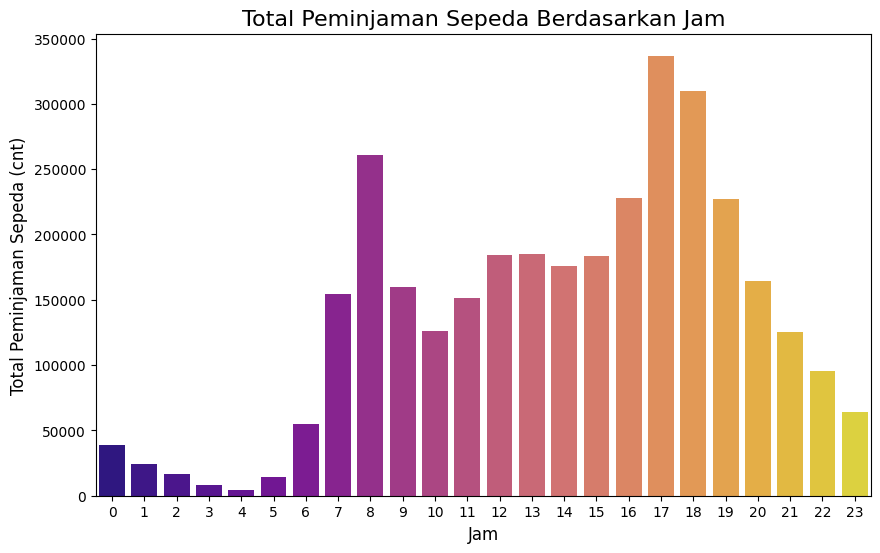

In [81]:
hourly_usage = df_hour.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values, palette="plasma")

plt.title('Total Peminjaman Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Peminjaman Sepeda (cnt)', fontsize=12)
plt.xticks(ticks=range(0, 24))  # Jam dari 0 hingga 23
plt.show()

### - Apakah hari kerja mempengaruhi jumlah pengguna sepeda dibandingkan dengan akhir pekan?

<ipython-input-87-25275f866966>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_usage, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


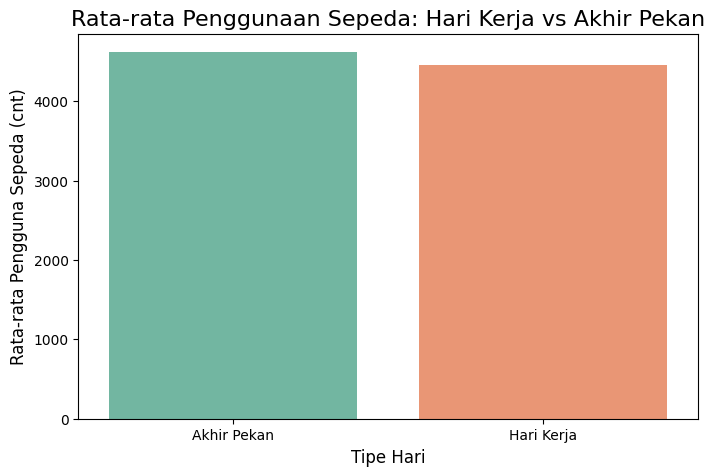

In [87]:
weekday_usage = df_day.groupby('weekday')['cnt'].mean().reset_index()

weekday_usage['day_type'] = weekday_usage['weekday'].apply(lambda x: 'Akhir Pekan' if x >= 5 else 'Hari Kerja')

day_type_usage = weekday_usage.groupby('day_type')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='cnt', data=day_type_usage, palette="Set2")

plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda (cnt)', fontsize=12)
plt.show()

**Insight:**
- Dari visualisasi chart, bisa dilihat bahwa menjelang sore terjadi peningkatan jumlah penyewaan sepeda dengan jam 18 sebagai puncaknya
- Tidak terjadi perbedaan signifikan jumlah penyewaan sepeda yang terjadi antara Hari kerja dan Akhir pekan

## Analisis Lanjutan (Opsional)

In [103]:
def categorize_time(hr):
    if hr < 6:
        return 'Early Morning'
    elif 6 <= hr < 12:
        return 'Morning'
    elif 12 <= hr < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_hour['Time Category'] = df_hour['hr'].apply(categorize_time)

time_grouped_data = df_hour.groupby('Time Category').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

print(time_grouped_data)


   Time Category      cnt  casual  registered
0      Afternoon  1292742  320180      972562
1  Early Morning   106509   19275       87234
2        Evening   986109  154214      831895
3        Morning   907319  126348      780971


<ipython-input-104-21a486bd0672>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=time_grouped_data,
<ipython-input-104-21a486bd0672>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_grouped_data,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

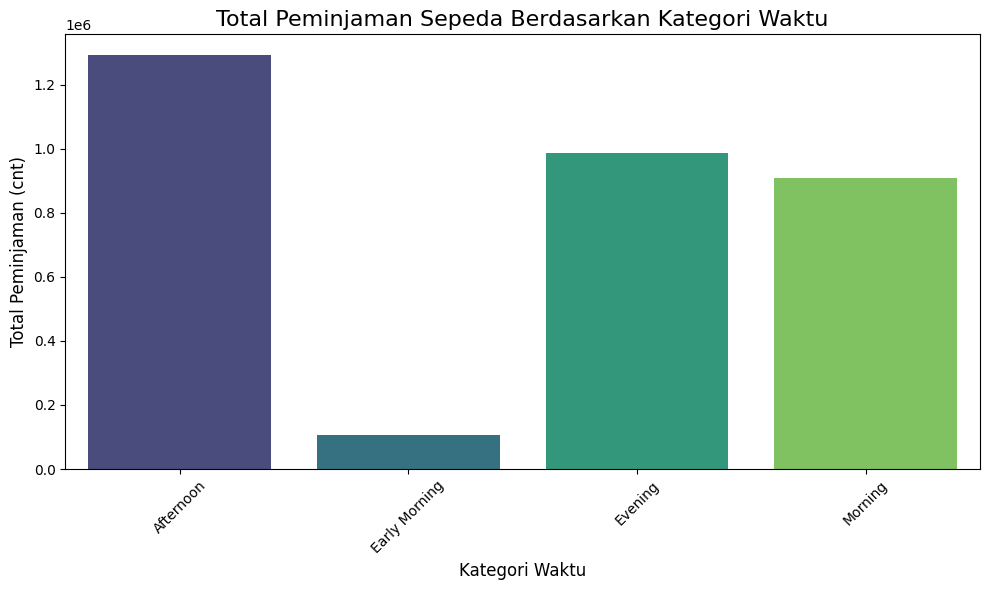

In [104]:
plt.figure(figsize=(10, 6))

sns.barplot(data=time_grouped_data,
            x='Time Category',
            y='cnt',
            palette='viridis',
            ci=None)

plt.title('Total Peminjaman Sepeda Berdasarkan Kategori Waktu', fontsize=16)
plt.xlabel('Kategori Waktu', fontsize=12)
plt.ylabel('Total Peminjaman (cnt)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Bisa dilihat bahwa penggunaan sepeda banyak dilakukan di 'afternoon' atau sore hari, berdasar analisa yang saya lakukan karena waktu tersebut suhu atau temperatur mulai menghangat sehingga nyaman digunakan bersepeda

## Conclusion

- Waktu Puncak Penggunaan Sepeda:
Waktu puncak penggunaan sepeda terjadi pada jam 18 atau sore hari. Hal ini terjadi karena di sore hari suhu dan cuaca mulai menghangat sehingga nyaman digunakan untuk bersepeda.

- Pengaruh Hari Kerja terhadap Penggunaan Sepeda:
Tidak ditemukan perbedaan yang signifikan antara penggunaan sepeda pada hari kerja dan akhir pekan. Bahkan, penggunaan sepeda cenderung lebih tinggi pada akhir pekan, yang mungkin menunjukkan bahwa sepeda lebih sering digunakan untuk kegiatan rekreasi atau santai di luar jam kerja.
Kesimpulan ini mengindikasikan bahwa pola penggunaan sepeda lebih dipengaruhi oleh waktu dalam sehari dibandingkan oleh hari kerja atau akhir pekan, dengan tren yang kuat pada jam pulang kerja.